In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler, MinMaxScaler, KBinsDiscretizer, PolynomialFeatures

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression

import hvplot.pandas
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

import seaborn as sns
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [10]:
data_df = pd.read_csv("Resources/tracks.csv")
data_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [11]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [12]:
data_df['release_year'] = [int(i.split('-')[0]) for i in data_df['release_date']]
data_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,1922
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,1922
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,1922
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,1922
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,1922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,...,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,2020
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,...,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,2020
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,...,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,2020
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,...,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,2021


Text(0.5, 1.0, '')

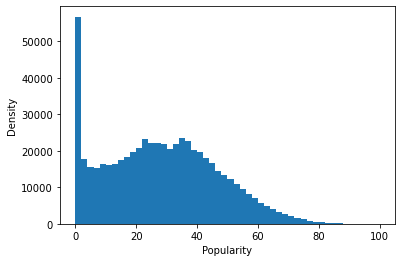

In [15]:
data_df.hist(column="popularity", bins=50, grid=False)
plt.xlabel('Popularity')
plt.ylabel('Density')
plt.title('')

In [5]:
data_df = data_df[data_df['release_year']>=2010]
data_df = data_df[data_df['speechiness']<0.66]

In [6]:
pd.isnull(data_df).sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
release_year        0
dtype: int64

In [8]:
data_df['poprange'] = KBinsDiscretizer(encode='ordinal', strategy = 'uniform').fit_transform(data_df['popularity'].values.reshape(-1,1))
data_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,poprange
39511,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,41,159560,0,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,0.671,0.867,...,1,0.0571,0.436,0.000000,0.1390,0.8390,120.689,4,2020,2.0
39529,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,26,187333,0,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,0.319,0.201,...,1,0.0623,0.887,0.000000,0.9040,0.2390,117.153,3,2018,1.0
39533,19oquvXf3bc65GSqtPYA5S,It Was A Very Good Year - Live At The Sands Ho...,25,236800,0,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,0.269,0.129,...,0,0.0576,0.938,0.000005,0.6830,0.1600,82.332,3,2018,1.0
39581,55qyghODi24yaDgKBI6lx0,"The Circle Game - Live at The 2nd Fret, Philad...",18,313093,0,['Joni Mitchell'],['5hW4L92KnC6dX9t7tYM4Ve'],2020-10-30,0.644,0.212,...,1,0.0347,0.881,0.000022,0.7980,0.4410,117.072,3,2020,0.0
39583,00xemFYjQNRpOlPhVaLAHa,"Urge For Going - Live at The 2nd Fret, Philade...",18,295093,0,['Joni Mitchell'],['5hW4L92KnC6dX9t7tYM4Ve'],2020-10-30,0.627,0.184,...,1,0.0450,0.955,0.000162,0.0986,0.2990,115.864,4,2020,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.518,...,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,2020,2.0
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.663,...,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,2020,3.0
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.314,...,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,2020,3.0
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.615,...,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,2021,2.0


In [9]:
data_df['poprange'].count()

125058

In [10]:
data_df['poprange'].value_counts()/data_df['poprange'].count()

2.0    0.434398
1.0    0.229965
0.0    0.183923
3.0    0.145173
4.0    0.006541
Name: poprange, dtype: float64

In [11]:
data_df.dtypes

id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
release_year          int64
poprange            float64
dtype: object

In [12]:
data_df.drop(['popularity'],axis =1)

,id,name,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,poprange
39511,6Pkt6qVikqPBt9bEQy8iTz,A Lover's Concerto,159560,0,['The Toys'],['6lH5PpuiMa5SpfjoIOlwCS'],2020-03-13,0.671,0.867,2,...,1,0.0571,0.436,0.000000,0.1390,0.8390,120.689,4,2020,2.0
39529,1hx7X9cMXHWJjknb9O6Ava,The September Of My Years - Live At The Sands ...,187333,0,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,0.319,0.201,7,...,1,0.0623,0.887,0.000000,0.9040,0.2390,117.153,3,2018,1.0
39533,19oquvXf3bc65GSqtPYA5S,It Was A Very Good Year - Live At The Sands Ho...,236800,0,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],2018-05-04,0.269,0.129,7,...,0,0.0576,0.938,0.000005,0.6830,0.1600,82.332,3,2018,1.0
39581,55qyghODi24yaDgKBI6lx0,"The Circle Game - Live at The 2nd Fret, Philad...",313093,0,['Joni Mitchell'],['5hW4L92KnC6dX9t7tYM4Ve'],2020-10-30,0.644,0.212,11,...,1,0.0347,0.881,0.000022,0.7980,0.4410,117.072,3,2020,0.0
39583,00xemFYjQNRpOlPhVaLAHa,"Urge For Going - Live at The 2nd Fret, Philade...",295093,0,['Joni Mitchell'],['5hW4L92KnC6dX9t7tYM4Ve'],2020-10-30,0.627,0.184,1,...,1,0.0450,0.955,0.000162,0.0986,0.2990,115.864,4,2020,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.518,0,...,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,2020,2.0
586668,0NuWgxEp51CutD2pJoF4OM,blind,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.663,0,...,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,2020,3.0
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.314,7,...,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,2020,3.0
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.615,10,...,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,2021,2.0


In [13]:
features = data_df.drop(['popularity','poprange','id','name','artists','id_artists','release_date'],axis =1)
poly = PolynomialFeatures(include_bias = False)
poly_features = poly.fit_transform(features)
poly_features_df = pd.DataFrame(poly_features, columns = poly.get_feature_names_out(features.columns))
poly_features_df

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence^2,valence tempo,valence time_signature,valence release_year,tempo^2,tempo time_signature,tempo release_year,time_signature^2,time_signature release_year,release_year^2
0,159560.0,0.0,0.671,0.867,2.0,-2.706,1.0,0.0571,0.436,0.000000,...,0.703921,101.258071,3.3560,1694.780,14565.834721,482.756,243791.780,16.0,8080.0,4080400.0
1,187333.0,0.0,0.319,0.201,7.0,-17.796,1.0,0.0623,0.887,0.000000,...,0.057121,27.999567,0.7170,482.302,13724.825409,351.459,236414.754,9.0,6054.0,4072324.0
2,236800.0,0.0,0.269,0.129,7.0,-18.168,0.0,0.0576,0.938,0.000005,...,0.025600,13.173120,0.4800,322.880,6778.558224,246.996,166145.976,9.0,6054.0,4072324.0
3,313093.0,0.0,0.644,0.212,11.0,-14.118,1.0,0.0347,0.881,0.000022,...,0.194481,51.628752,1.3230,890.820,13705.853184,351.216,236485.440,9.0,6060.0,4080400.0
4,295093.0,0.0,0.627,0.184,1.0,-15.533,1.0,0.0450,0.955,0.000162,...,0.089401,34.643336,1.1960,603.980,13424.466496,463.456,234045.280,16.0,8080.0,4080400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125053,258267.0,0.0,0.560,0.518,0.0,-7.471,0.0,0.0292,0.785,0.000000,...,0.044521,27.830056,0.8440,426.220,17396.554816,527.584,266429.920,16.0,8080.0,4080400.0
125054,153293.0,0.0,0.765,0.663,0.0,-5.223,1.0,0.0652,0.141,0.000297,...,0.470596,102.962426,2.7440,1385.720,22527.308281,600.364,303183.820,16.0,8080.0,4080400.0
125055,187601.0,0.0,0.535,0.314,7.0,-12.823,0.0,0.0408,0.895,0.000150,...,0.004396,9.619798,0.2652,133.926,21052.559025,580.380,293091.900,16.0,8080.0,4080400.0
125056,142003.0,0.0,0.696,0.615,10.0,-6.212,1.0,0.0345,0.206,0.000003,...,0.191844,39.432702,1.7520,885.198,8105.220841,360.116,181948.609,16.0,8084.0,4084441.0


In [14]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(poly_features_df)
#profile

In [15]:
target_names = list(poly_features_df.columns)
target_names

['duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'release_year',
 'duration_ms^2',
 'duration_ms explicit',
 'duration_ms danceability',
 'duration_ms energy',
 'duration_ms key',
 'duration_ms loudness',
 'duration_ms mode',
 'duration_ms speechiness',
 'duration_ms acousticness',
 'duration_ms instrumentalness',
 'duration_ms liveness',
 'duration_ms valence',
 'duration_ms tempo',
 'duration_ms time_signature',
 'duration_ms release_year',
 'explicit^2',
 'explicit danceability',
 'explicit energy',
 'explicit key',
 'explicit loudness',
 'explicit mode',
 'explicit speechiness',
 'explicit acousticness',
 'explicit instrumentalness',
 'explicit liveness',
 'explicit valence',
 'explicit tempo',
 'explicit time_signature',
 'explicit release_year',
 'danceability^2',
 'danceability energy',
 'danceability key',
 'danceability loudness',
 

In [16]:
poly_features_df.count()

duration_ms                    125058
explicit                       125058
danceability                   125058
energy                         125058
key                            125058
                                ...  
tempo time_signature           125058
tempo release_year             125058
time_signature^2               125058
time_signature release_year    125058
release_year^2                 125058
Length: 135, dtype: int64

# Reducing Memory

##### Using this function as means of speeding up computations

In [17]:
def reduce_mem_usage(df):
    start_mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :",start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in df.columns:
        if df[col].dtype != object:  # Exclude strings              
            # make variables for Int, max and min
            IsInt = False
            mx = df[col].max()
            mn = df[col].min()
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(df[col]).all(): 
                NAlist.append(col)
                df[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = df[col].fillna(0).astype(np.int64)
            result = (df[col] - asint)
            result = result.sum()
            if result > -0.01 and result < 0.01:
                IsInt = True            
            # Make Integer/unsigned Integer datatypes
            if IsInt:
                if mn >= 0:
                    if mx < 255:
                        df[col] = df[col].astype(np.uint8)
                    elif mx < 65535:
                        df[col] = df[col].astype(np.uint16)
                    elif mx < 4294967295:
                        df[col] = df[col].astype(np.uint32)
                    else:
                        df[col] = df[col].astype(np.uint64)
                else:
                    if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                        df[col] = df[col].astype(np.int8)
                    elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                        df[col] = df[col].astype(np.int16)
                    elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                        df[col] = df[col].astype(np.int32)
                    elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                        df[col] = df[col].astype(np.int64)    
            # Make float datatypes 32 bit
            else:
                df[col] = df[col].astype(np.float32)
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = df.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")

In [18]:
reduce_mem_usage(poly_features_df)

Memory usage of properties dataframe is : 128.80589294433594  MB
___MEMORY USAGE AFTER COMPLETION:___
Memory usage is:  59.155364990234375  MB
This is  45.9259771723322 % of the initial size


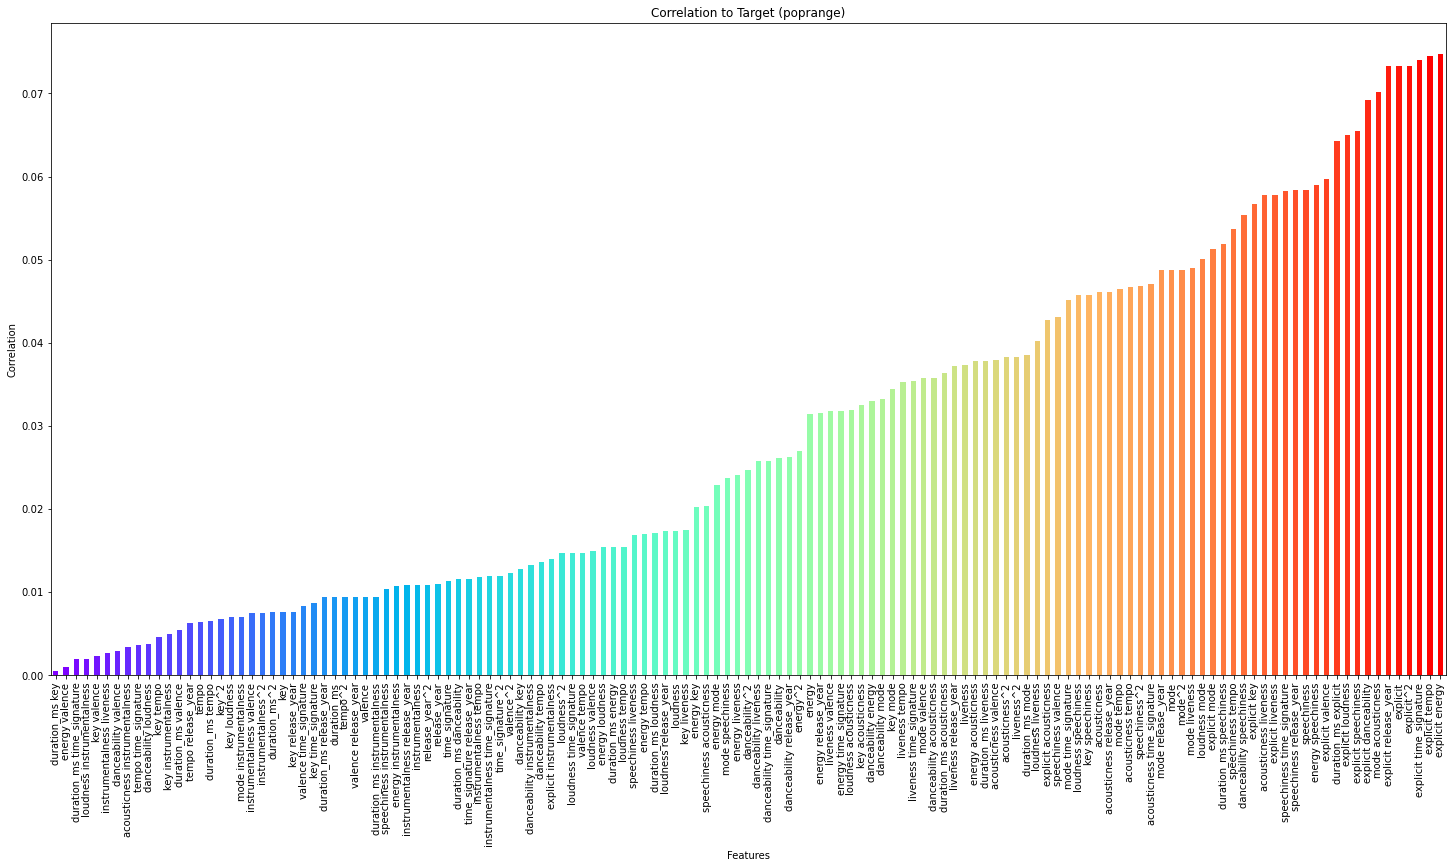



 duration_ms key               0.000538
energy valence                0.000954
duration_ms time_signature    0.001890
loudness instrumentalness     0.001941
key valence                   0.002263
                                ...   
explicit                      0.073325
explicit^2                    0.073325
explicit time_signature       0.074060
explicit tempo                0.074454
explicit energy               0.074770
Length: 135, dtype: float64


In [25]:
n_fts = len(poly_features_df.columns)
colors = cm.rainbow(np.linspace(0, 1, n_fts))

poly_features_df.corrwith(data_df.poprange).abs().sort_values(ascending=True).plot(kind='bar',
                                                                                   color=colors, 
                                                                                   figsize=(25, 12))
plt.title('Correlation to Target (poprange)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.savefig('corr.png', bbox_inches='tight')
plt.show()

print('\n\n',poly_features_df.corrwith(data_df.poprange).abs().sort_values(ascending=True))

In [23]:
#corr_df = poly_features_df.corrwith(data_df.poprange).abs().sort_values(ascending=True)
#corr_df_filt = corr_df[corr_df > 0.02]
#feature_names = corr_df_filt.index
#corr_df_filt

In [24]:
corr_df = poly_features_df.corrwith(data_df.poprange).abs().sort_values(ascending=True)
feature_names = corr_df.index

multiclass classification sk learn
mlextend: sequential feature selection 

# Logistic Regression

In [25]:
y = data_df["poprange"]
X = poly_features_df[feature_names]

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [27]:
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear', random_state=1, n_jobs = -1,verbose = 5)
classifier

LogisticRegression(n_jobs=-1, random_state=1, solver='liblinear', verbose=5)

In [32]:
classifier.fit(X_train_scaled, y_train)

[LibLinear]iter  1 act 2.854e+04 pre 2.598e+04 delta 1.462e+00 f 6.501e+04 |g| 6.912e+04 CG   5
iter  2 act 3.041e+03 pre 2.640e+03 delta 1.462e+00 f 3.647e+04 |g| 1.400e+04 CG   9
cg reaches trust region boundary
iter  3 act 8.288e+02 pre 7.667e+02 delta 1.608e+00 f 3.343e+04 |g| 4.129e+03 CG  16
cg reaches trust region boundary
iter  4 act 2.435e+02 pre 2.366e+02 delta 1.664e+00 f 3.260e+04 |g| 1.178e+03 CG  21
iter  5 act 6.087e+01 pre 5.943e+01 delta 1.664e+00 f 3.236e+04 |g| 4.060e+02 CG  50
iter  6 act 3.210e+00 pre 3.156e+00 delta 1.664e+00 f 3.230e+04 |g| 1.087e+02 CG  61
cg reaches trust region boundary
iter  7 act 2.463e+00 pre 2.470e+00 delta 1.681e+00 f 3.230e+04 |g| 1.211e+01 CG  70
iter  8 act 1.106e+00 pre 1.101e+00 delta 1.681e+00 f 3.229e+04 |g| 1.696e+01 CG 144
iter  9 act 3.947e-03 pre 3.947e-03 delta 1.681e+00 f 3.229e+04 |g| 1.851e+00 CG  50
iter  1 act 1.749e+04 pre 1.621e+04 delta 1.215e+00 f 6.501e+04 |g| 3.413e+04 CG   6
iter  2 act 9.067e+02 pre 8.101e+02 delt

LogisticRegression(n_jobs=-1, random_state=1, solver='liblinear', verbose=5)

In [34]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.18392630580107258
Testing Data Score: 0.18391172237326084


# Support Vector Machine

In [35]:
from sklearn.svm import SVC 
model = SVC(kernel='rbf', verbose= True)
model.fit(X_train_scaled, y_train)

[LibSVM]....................*........*
optimization finished, #iter = 28435
obj = -17519.637924, rho = -0.477133
nSV = 19794, nBSV = 17710
..............................*............*
optimization finished, #iter = 42853
obj = -20967.106362, rho = -0.134031
nSV = 23582, nBSV = 21032
..............*.....*
optimization finished, #iter = 19910
obj = -13361.650521, rho = -0.708507
nSV = 15277, nBSV = 13646
....
*......*.*
optimization finished, #iter = 10510
obj = -1157.538743, rho = -1.164298
nSV = 1785, nBSV = 948
.................................................................*..........................................*.....*
optimization finished, #iter = 112484
obj = -42311.706237, rho = 0.467347
nSV = 44758, nBSV = 41324
...................*......*
optimization finished, #iter = 25542
obj = -18584.112043, rho = -0.303831
nSV = 20236, nBSV = 18853
.....
*..........*.*
optimization finished, #iter = 15941
obj = -1210.680360, rho = -1.021557
nSV = 2065, nBSV = 897
.....................

SVC(verbose=True)

In [36]:
print('Test Acc: %.3f' % model.score(X_test_scaled, y_test))

Test Acc: 0.516


In [37]:
# Calculate the classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test_scaled)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.73      0.53      0.61      5750
         1.0       0.50      0.01      0.02      7190
         2.0       0.48      0.95      0.64     13581
         3.0       0.53      0.02      0.04      4539
         4.0       0.00      0.00      0.00       205

    accuracy                           0.52     31265
   macro avg       0.45      0.30      0.26     31265
weighted avg       0.53      0.52      0.40     31265



# Random Forest Classifier

In [38]:
y = data_df["poprange"]
X = poly_features_df[feature_names]

In [39]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

print('Removed indexes:')

print(X_ros.shape, y_ros.shape)

Removed indexes:
(271625, 135) (271625,)


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X_ros, y_ros, random_state=1)

print(f'X_y_train shape: {X_train.shape} {y_train.shape}' )
print(f'X_y_test shape: {X_test.shape} {y_test.shape}' )

X_y_train shape: (203718, 135) (203718,)
X_y_test shape: (67907, 135) (67907,)


In [43]:
scaler = StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [44]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=1)

In [45]:
rf_model = rf_model.fit(X_train_scaled, y_train)

In [46]:
predictions = rf_model.predict(X_test_scaled)

In [47]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [48]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,0,1,2,3,4
0,12722,305,431,82,36
1,501,10823,2077,242,12
2,885,2789,7953,1808,20
3,125,157,868,12369,61
4,15,0,0,0,13626


Accuracy Score : 0.8466432032043825
Classification Report
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91     13576
         1.0       0.77      0.79      0.78     13655
         2.0       0.70      0.59      0.64     13455
         3.0       0.85      0.91      0.88     13580
         4.0       0.99      1.00      0.99     13641

    accuracy                           0.85     67907
   macro avg       0.84      0.85      0.84     67907
weighted avg       0.84      0.85      0.84     67907



In [49]:
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.02106278345995833, 'release_year'),
 (0.019754760302480898, 'release_year^2'),
 (0.016834881226521884, 'time_signature release_year'),
 (0.016120292305269686, 'energy loudness'),
 (0.01150548967614061, 'duration_ms danceability'),
 (0.011443716403916164, 'duration_ms release_year'),
 (0.011251771151198683, 'duration_ms'),
 (0.011161851726121094, 'duration_ms energy'),
 (0.01114918696315463, 'duration_ms^2'),
 (0.010851560054141318, 'duration_ms time_signature'),
 (0.010489789336536727, 'loudness valence'),
 (0.010331597498189507, 'duration_ms loudness'),
 (0.010250436240841933, 'duration_ms tempo'),
 (0.009881069154722706, 'acousticness valence'),
 (0.00977028852373926, 'instrumentalness liveness'),
 (0.009628880625202297, 'loudness tempo'),
 (0.009531852013334077, 'danceability tempo'),
 (0.009500780969247414, 'instrumentalness tempo'),
 (0.009500294581327234, 'instrumentalness time_signature'),
 (0.00947472883465737, 'speechiness instrumentalness'),
 (0.009459235011989016, 'energ

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

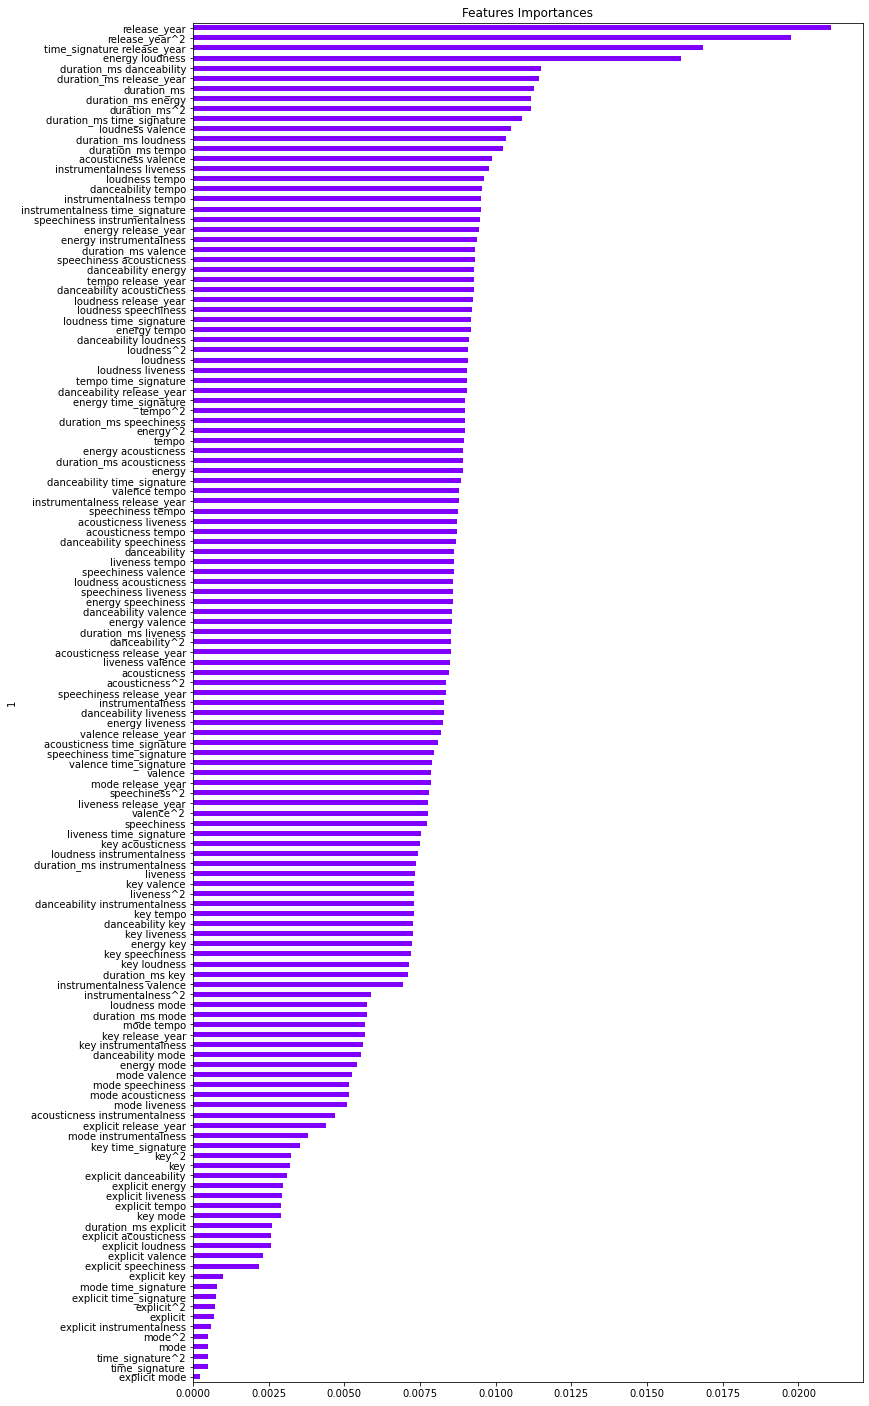

In [50]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', title= 'Features Importances', legend=False, color=colors, figsize=(12, 25))

# Sequential Feature Selection

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
sfs = SequentialFeatureSelector(knn, n_features_to_select=30)

In [52]:
y = data_df["poprange"]
X = poly_features_df[feature_names]

In [53]:
sfs.fit(X, y) # forgot to put verbose = 5, n_jobs = -1

SequentialFeatureSelector(estimator=KNeighborsClassifier(),
                          n_features_to_select=30)

In [54]:
SequentialFeatureSelector(estimator= KNeighborsClassifier(),
                          n_features_to_select=30)

SequentialFeatureSelector(estimator=KNeighborsClassifier(),
                          n_features_to_select=30)

In [62]:
sfs.get_params(deep = True)

{'cv': 5,
 'direction': 'forward',
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(),
 'n_features_to_select': 30,
 'n_jobs': None,
 'scoring': None,
 'tol': None}

In [57]:
sfs.get_support()

array([False, False, False,  True, False,  True, False,  True, False,
        True, False, False, False, False, False, False, False, False,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
       False,  True,  True, False, False, False,  True,  True, False,
       False,  True, False,  True, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False,  True,  True,  True, False, False,  True,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,

In [58]:
sfs.transform(X).shape

(125058, 30)

In [61]:
important_features= sfs.get_feature_names_out()
important_features

array(['loudness instrumentalness', 'instrumentalness liveness',
       'acousticness instrumentalness', 'danceability loudness',
       'mode instrumentalness', 'instrumentalness valence',
       'instrumentalness^2', 'speechiness instrumentalness',
       'instrumentalness', 'release_year', 'time_signature',
       'instrumentalness time_signature', 'time_signature^2',
       'danceability instrumentalness', 'explicit instrumentalness',
       'energy loudness', 'speechiness liveness', 'mode speechiness',
       'loudness acousticness', 'liveness', 'energy acousticness',
       'acousticness valence', 'acousticness^2', 'liveness^2',
       'explicit acousticness', 'speechiness valence', 'acousticness',
       'speechiness^2', 'acousticness time_signature',
       'explicit speechiness'], dtype=object)

# Selected features Random Forest

In [63]:
yif = data_df["poprange"]
Xif = poly_features_df[important_features]

In [64]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros2, y_ros2 = ros.fit_resample(Xif, yif)

print('Removed indexes:')

print(X_ros2.shape, y_ros2.shape)

Removed indexes:
(271625, 30) (271625,)


In [65]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2= train_test_split(X_ros2, y_ros2, random_state=1)

print(f'X_y_train shape: {X_train2.shape} {y_train2.shape}' )
print(f'X_y_test shape: {X_test2.shape} {y_test2.shape}' )

X_y_train shape: (203718, 30) (203718,)
X_y_test shape: (67907, 30) (67907,)


In [67]:
scaler = StandardScaler()

X_scaler2 = scaler.fit(X_train2)

X_train_scaled2 = X_scaler2.transform(X_train2)
X_test_scaled2 = X_scaler2.transform(X_test2)

In [68]:
rf_model2 = RandomForestClassifier(n_estimators=500, random_state=1)

In [69]:
rf_model2 = rf_model.fit(X_train_scaled2, y_train2)

In [70]:
predictions2 = rf_model.predict(X_test_scaled2)

In [71]:
cm2 = confusion_matrix(y_test2, predictions2)
cm_df2 = pd.DataFrame(
    cm2
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test2, predictions2)

In [72]:
# Displaying results
print("Confusion Matrix")
display(cm_df2)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test2, predictions2))

Confusion Matrix


,0,1,2,3,4
0,12624,348,502,99,3
1,525,10840,2012,271,7
2,1063,3015,7487,1872,18
3,113,141,777,12479,70
4,29,0,0,0,13612


Accuracy Score : 0.8400017671226825
Classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     13576
         1.0       0.76      0.79      0.77     13655
         2.0       0.69      0.56      0.62     13455
         3.0       0.85      0.92      0.88     13580
         4.0       0.99      1.00      1.00     13641

    accuracy                           0.84     67907
   macro avg       0.83      0.84      0.83     67907
weighted avg       0.83      0.84      0.84     67907

